# Lecture 2: Time Integration Methods and Lorentz Motion
In this lecture, we will explore different time integration methods for simulating the motion of a particle in a constant electromagnetic field.

Time integration methods are numerical techniques used to approximate the solutions of ordinary differential equations (ODEs) over a sequence of discrete time steps. These methods play a crucial role in simulating dynamic systems and physical processes that evolve over time. In the context of computational electromagnetics and plasma physics, time integration is essential for accurately modeling the interactions between electromagnetic fields and charged particles.

# Explicit and Implicit Numerical Integration Schemes

Numerical integration schemes are essential tools in computational physics for approximating the solutions of ordinary differential equations (ODEs) and simulating the behavior of dynamical systems. Two main categories of numerical integration schemes are explicit and implicit methods, each with its own advantages and considerations.

## Explicit

In an explicit numerical integration scheme, the solution at the next time step is computed explicitly using the information from the current time step. One of the simplest explicit methods is Euler's method. Given an ODE $\frac{dy}{dt} = f(t, y)$ and an initial condition $y(t_0) = y_0$, the explicit Euler's method updates the solution as:

$$
y_{n+1} = y_n + \Delta t \cdot f(t_n, y_n)
$$

Explicit methods are generally easy to implement and computationally efficient. However, they may have limitations in terms of stability and accuracy, especially for stiff or oscillatory systems.

## Implicit

In an implicit numerical integration scheme, the solution at the next time step is obtained by solving an equation that involves both the current and future values of the solution. This often requires iterative methods to find the solution. One common implicit method is the backward Euler method. Given the same ODE and initial condition, the backward Euler's method updates the solution as:

$$
y_{n+1} = y_n + \Delta t \cdot f(t_{n+1}, y_{n+1})
$$

Implicit methods are more stable than explicit methods and can handle stiff systems more effectively. They are particularly useful when the time step needs to be large or when dealing with complex systems.

## Comparison and Considerations

Explicit methods are generally easier to implement and compute, but they may require smaller time steps for stability. Implicit methods offer better stability and accuracy but involve solving nonlinear equations at each time step, which can be computationally expensive.

The choice between explicit and implicit methods depends on the specific characteristics of the problem at hand, including stability requirements, desired accuracy, and computational resources.

# Example: Lorentz Equation

As an illustrative example for applying time integration methods, let's consider the Lorentz equation, which describes the motion of a charged particle in an electromagnetic field. The Lorentz equation can be written as follows:

$$
\frac{d\mathbf{v}}{dt} = \frac{q}{m} \left( \mathbf{E} + \mathbf{v} \times \mathbf{B} \right)
$$

where:
- $\mathbf{v}$ is the velocity vector of the particle,
- $\mathbf{E}$ is the electric field vector,
- $\mathbf{B}$ is the magnetic field vector,
- $q$ is the charge of the particle,
- $m$ is the mass of the particle.


To discretize this equation, we'll use a time step $\Delta t$ and update the particle's velocity and position as follows:

$$
\Delta \mathbf{v} = \frac{q}{m} \left( \mathbf{E} + \mathbf{v} \times \mathbf{B} \right) \cdot \Delta t
$$

$$
\Delta \mathbf{x} = \mathbf{v} \cdot \Delta t
$$

In this example, we'll use the Lorentz equation to simulate the motion of a charged particle in a constant electromagnetic field using various time integration methods that we've discussed.

To begin, we'll need to define the initial conditions, such as the particle's initial position, velocity, charge, mass, and the components of the electric and magnetic fields. We'll then apply the chosen time integration methods to update the particle's velocity and position over a sequence of discrete time steps. The resulting trajectory of the particle will provide insights into its motion under the influence of the electromagnetic field.

Show that in a constant cross field $\mathbf{E} = (0,E,0)$ and $\mathbf{B} = (0,0,B)$ that particle path obeys the following parametric equations

$$
x(t) = R (\omega t - \sin \omega t)
$$

$$
y(t) = R (1- \cos \omega t)
$$

where $\omega = \frac{qB}{m}$ and $R = \frac{m E}{q B^2}$.

<div style="text-align:center">
    <figure>
        <img src="cycloid.gif" alt="cycloid" style="width: 1000;">
        <figcaption>Fig.1 Cycloid Motion</figcaption>
    </figure>
</div>

## Euler's First-Order Scheme

Euler's method is a simple and straightforward time integration technique. Given an initial state $(x_0, y_0)$ and an ordinary differential equation $\frac{dx}{dt} = f(x, y)$ and $\frac{dy}{dt} = g(x, y)$, the Euler's method updates the state at each time step using the following formula:

$$
x_{i+1} = x_i + f(x_i, y_i) \cdot \Delta t
$$
$$
y_{i+1} = y_i + g(x_i, y_i) \cdot \Delta t
$$

where $\Delta t$ is the time step size, and $f(x, y)$ and $g(x, y)$ are the functions defining the derivatives in the x and y directions, respectively.

<div style="text-align:center">
    <figure>
        <img src="euler.svg" alt="Euler's Method" style="width: 400px;background-color: #EEE;">
        <figcaption>Fig.2 Euler's Method</figcaption>
    </figure>
</div>

### Implementation
Let's implement Euler's first-order scheme for simulating the projectile motion in a constant electromagnetic field.

In [1]:
import numpy as np
# Define Parameters
x0 = 1.0  # meters
y0 = 0.0  # meters
initial_velocity = 1.0  # m/s
initial_angle = np.pi/2  # degrees

# field parameters
E = 1
B = 1

q_m = 1  # charge-to-mass ratio

# Time step size for the simulation
dt = 0.01  # seconds

# Number of time steps to simulate
num_steps = 1000

In [2]:
import numpy as np

# Implement Euler's first-order scheme
def euler_method(dt, num_steps, acceleration_function):
    # Initialize arrays to store positions and velocities
    x_euler = np.zeros(num_steps)
    y_euler = np.zeros(num_steps)
    vx_euler = np.zeros(num_steps)
    vy_euler = np.zeros(num_steps)
    
    # Initial conditions
    x_euler[0] = x0
    y_euler[0] = y0
    vx_euler[0] = initial_velocity*np.cos(initial_angle)
    vy_euler[0] = initial_velocity*np.sin(initial_angle)
    
    # Time integration loop
    for i in range(1, num_steps):
        ax, ay = acceleration_function(vx_euler[i - 1], vy_euler[i - 1], E, B)
        
        # Update velocities and positions using Euler's method
        vx_euler[i] = vx_euler[i - 1] + ax * dt
        vy_euler[i] = vy_euler[i - 1] + ay * dt
        x_euler[i] = x_euler[i - 1] + vx_euler[i] * dt
        y_euler[i] = y_euler[i - 1] + vy_euler[i] * dt
    
    return x_euler, y_euler

### Simulation and Visualization
Let's simulate the projectile motion using Euler's first-order scheme and visualize the trajectory.

In [3]:
import numpy as np

# Function to calculate constant field acceleration
def constant_field_acceleration(vx, vy, E, B):
    # Define constant electromagnetic field components
    E_x = 0  # Electric field in x-direction (N/C)
    E_y = E   # Electric field in y-direction (N/C)
    B_z = B    # Magnetic field in z-direction (T)
    
    # Calculate particle's charge-to-mass ratio (q/m)
    q_m = 1  # Elementary charge to alpha particle mass ratio
    
    # Calculate acceleration components using Lorentz force equation
    ax = q_m * (E_x + vy * B_z)
    ay = q_m * (E_y - vx * B_z)
    
    return ax, ay


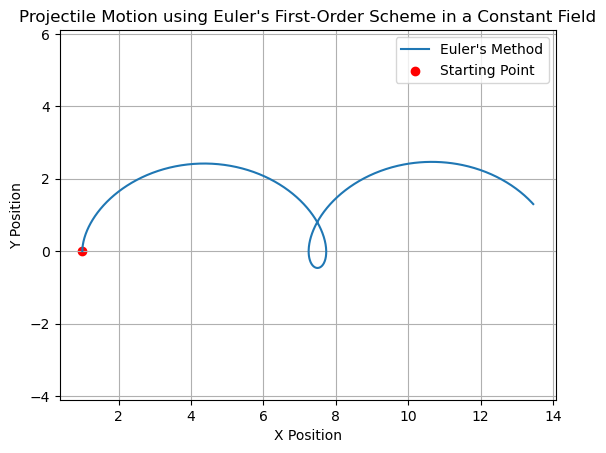

In [4]:
import pylab as plt
# Simulate projectile motion using Euler's first-order scheme
x_euler, y_euler = euler_method(dt, num_steps, constant_field_acceleration)

# Plot the trajectory
# plt.figure(figsize=(10, 6))
plt.plot(x_euler, y_euler, label="Euler's Method")
plt.scatter(x0, y0, color='red', label='Starting Point')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title("Projectile Motion using Euler's First-Order Scheme in a Constant Field")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## Leapfrog Method

The leapfrog method is a second-order implicit time integration technique commonly used for conservative systems. It updates positions and velocities at alternating time steps, leading to improved accuracy and energy conservation.

For an ODE,

$$
\dfrac{d y}{d t} = f(y(t),t)
$$

We write

$$
\dfrac{y_\text{new} - y_\text{old}}{\Delta t} = f((y_\text{new} + y_\text{old})/2, t)
$$

where $y_\text{new} = y(t+\Delta t/2)$, and $y_\text{old} = y(t-\Delta t/2)$. This is an implicit equation for $y_\text{new}$, but it can be solved by iteration.

If we define angular cyclotron frequency vector $\mathbf{\Omega} = q\mathbf{B}/m$ and normalized electric field $\mathbf{\Sigma} = q\mathbf{E}/m$, then the Lorentz force becomes

$$
\dfrac{dv}{dt} = \mathbf{\Omega} \times \mathbf{v} + \mathbf{\Sigma}
$$

Show that the implitcit leapfrog method gives

$$
v_\text{new} + \mathbf{A} \times v_\text{new} = \mathbf{C}
$$

where $\mathbf{A} = \mathbf{\Omega} \Delta t/2$ and $\mathbf{C} = v_\text{old} + \Delta t (\mathbf{\Sigma}  + v_\text{old} \times \mathbf{\Omega}/2)$.

Show that we can solve for $v_\text{new}$ by iteration using

$$
v_\text{new} = \dfrac{\mathbf{C} + \mathbf{A} \mathbf{A} \cdot \mathbf{C} - \mathbf{A} \times \mathbf{C}}{1+ A^2}
$$

Then update the new position using
$$
x_\text{new} = x_\text{old} + v_\text{new} \Delta t 
$$

For our cross-fields $\mathbf{E} = E_y \hat{j}$ and $\mathbf{B} = B_z \hat{k}$, show that we can update the new velocities $(v_x',v_y')$ from the old one $(v_x,v_y)$ using

\begin{align*}
v_x' &= \dfrac{v_x + v_y \Omega \Delta t}{1+(\Omega \Delta t/2)^2} \\
v_y' &= \dfrac{v_y - v_x \Omega \Delta t + \Sigma \Delta t}{1+(\Omega \Delta t/2)^2} \\ 
\end{align*}

### Implementation
Let's implement the leapfrog method for simulating the projectile motion in a constant electromagnetic field.

In [5]:
def leapfrog_method(dt, num_steps, E, B):
    # Initialize arrays to store positions and velocities
    x_leapfrog = np.zeros(num_steps)
    y_leapfrog = np.zeros(num_steps)
    vx_leapfrog = np.zeros(num_steps)
    vy_leapfrog = np.zeros(num_steps)
    
    # Initial conditions
    x_leapfrog[0] = x0
    y_leapfrog[0] = y0
    vx_leapfrog[0] = initial_velocity * np.cos(initial_angle)
    vy_leapfrog[0] = initial_velocity * np.sin(initial_angle)
    
    # nommalized fields
    sigma = q_m * E
    omega = q_m * B

    # Time integration loop
    for i in range(1, num_steps):
        
        # Update velocities using leapfrog method (half time-step)
        vx_leapfrog[i] = (vx_leapfrog[i - 1] + vy_leapfrog[i - 1] * omega * dt)/(1 + (omega * dt/2)**2)
        vy_leapfrog[i] = (vy_leapfrog[i - 1] - vx_leapfrog[i - 1] * omega * dt + sigma * dt)/(1 + (omega * dt/2)**2)
        
        # Update positions using updated velocities
        x_leapfrog[i] = x_leapfrog[i - 1] + vx_leapfrog[i] * dt
        y_leapfrog[i] = y_leapfrog[i - 1] + vy_leapfrog[i] * dt
    
    return x_leapfrog, y_leapfrog

In [6]:
def leapfrog_explicit_method(dt, num_steps, E, B):
    # Initialize arrays to store positions and velocities
    x_leapfrog = np.zeros(num_steps)
    y_leapfrog = np.zeros(num_steps)
    vx_leapfrog = np.zeros(num_steps)
    vy_leapfrog = np.zeros(num_steps)
    
    # Initial conditions
    x_leapfrog[0] = x0
    y_leapfrog[0] = y0
    vx_leapfrog[0] = initial_velocity * np.cos(initial_angle)
    vy_leapfrog[0] = initial_velocity * np.sin(initial_angle)
    
    # nommalized fields
    sigma = q_m * E
    omega = q_m * B

    # Time integration loop
    for i in range(1, num_steps):

        ax, ay = acceleration_function(vx_euler[i - 1], vy_euler[i - 1], E, B)
        
        # Update velocities and positions using Euler's method
        vx_euler[i] = vx_euler[i - 1] + ax * dt
        vy_euler[i] = vy_euler[i - 1] + ay * dt
        x_euler[i] = x_euler[i - 1] + vx_euler[i] * dt
        y_euler[i] = y_euler[i - 1] + vy_euler[i] * dt

        # tempporary slope (position and velocity)
        vx_temp = vx_leapfrog[i - 1] + vy_leapfrog[i - 1] * omega * dt
        vy_temp = vy_leapfrog[i - 1] - vx_leapfrog[i - 1] * omega * dt + sigma * dt
        x_temp = x_leapfrog[i - 1] + vx_leapfrog[i - 1] * dt
        y_temp = y_leapfrog[i - 1] + vy_leapfrog[i - 1] * dt
        
        # Update velocities using leapfrog method (half time-step)
        vx_leapfrog[i] = (vx_leapfrog[i - 1] + vy_leapfrog[i - 1] * omega * dt)/(1 + (omega * dt/2)**2)
        vy_leapfrog[i] = (vy_leapfrog[i - 1] - vx_leapfrog[i - 1] * omega * dt + sigma * dt)/(1 + (omega * dt/2)**2)
        
        # Update positions using updated velocities
        x_leapfrog[i] = x_leapfrog[i - 1] + vx_leapfrog[i] * dt
        y_leapfrog[i] = y_leapfrog[i - 1] + vy_leapfrog[i] * dt
    
    return x_leapfrog, y_leapfrog

### Simulation and Visualization
Let's simulate the projectile motion using the leapfrog method and visualize the trajectory.

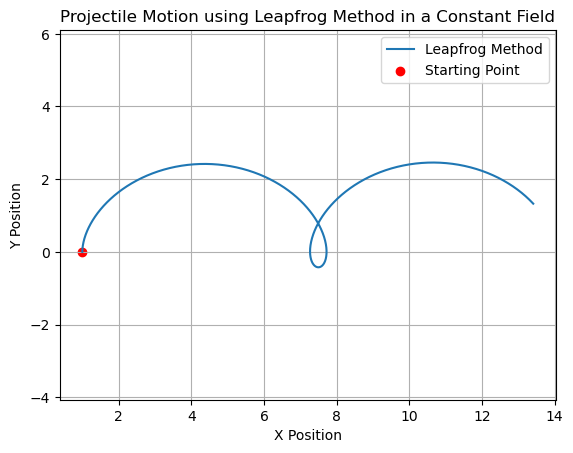

In [7]:
# Simulate projectile motion using leapfrog method
x_leapfrog, y_leapfrog = leapfrog_method(dt, num_steps, E, B)

# Plot the trajectory
# plt.figure(figsize=(10, 6))
plt.plot(x_leapfrog, y_leapfrog, label="Leapfrog Method")
plt.scatter(x0, y0, color='red', label='Starting Point')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title("Projectile Motion using Leapfrog Method in a Constant Field")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# Runge-Kutta 4 Method

The Runge-Kutta method is a popular time integration technique for solving ordinary differential equations. It is an explicit method that is easy to implement and computationally efficient. The fourth-order Runge-Kutta method (RK4) is one of the most widely used Runge-Kutta methods. It is a higher-order method that offers better accuracy than the Euler's method.

The RK4 method involves breaking down the ODE into a series of smaller steps and iteratively calculating the next step based on the current step's information. It uses four intermediate estimates to improve accuracy, making it a higher-order method compared to simpler techniques like Euler's method.

### Steps
1. Given an initial value and an ODE, you start with an initial point.
2. Calculate the values of the ODE at the initial point.
3. Use these values to estimate the function's behavior over a small time interval.
4. Calculate four intermediate estimates of the function using the initial point and the estimated behavior.
5. Combine these intermediate estimates to compute the weighted average, which becomes the next point's value.
6. Repeat these steps to move iteratively along the solution curve of the ODE.

### Implementation

For an ODE,

$$
\dfrac{d y}{d t} = f(y(t),t)
$$

In this case,

$$
\dfrac{d \mathbf{v}}{dt} = \mathbf{\Omega} \times \mathbf{v} + \mathbf{\Sigma}
$$

$$
\dfrac{d \mathbf{x}}{dt} = \mathbf{v}
$$


We update the solution using

$$ \begin{aligned} & k_1 = h f(t_n, y_n) \\ & k_2 = h f \left(t_n + \frac{h}{2}, y_n + \frac{k_1}{2} \right) \\ & k_3 = h f \left(t_n + \frac{h}{2}, y_n + \frac{k_2}{2} \right) \\ & k_4 = h f(t_n + h, y_n + k_3) \\ & y_{n+1} = y_n + \frac{k_1 + 2k_2 + 2k_3 + k_4}{6} \end{aligned}$$            

In [8]:
import numpy as np


# Function to calculate constant field acceleration
def constant_field_acceleration(vx, vy, E, B):
    # Define constant electromagnetic field components
    E_x = 0  # Electric field in x-direction (N/C)
    E_y = E   # Electric field in y-direction (N/C)
    B_z = B    # Magnetic field in z-direction (T)
    
    # Calculate particle's charge-to-mass ratio (q/m)
    q_m = 1  # Elementary charge to alpha particle mass ratio
    
    # Calculate acceleration components using Lorentz force equation
    ax = q_m * (E_x + vy * B_z)
    ay = q_m * (E_y - vx * B_z)
    
    return ax, ay

def rk4_method(dt, num_steps, E, B):
    # Initialize arrays to store positions and velocities
    x_rk4 = np.zeros(num_steps)
    y_rk4 = np.zeros(num_steps)
    vx_rk4 = np.zeros(num_steps)
    vy_rk4 = np.zeros(num_steps)
    
    # Initial conditions
    x_rk4[0] = x0
    y_rk4[0] = y0
    vx_rk4[0] = initial_velocity * np.cos(initial_angle)
    vy_rk4[0] = initial_velocity * np.sin(initial_angle)
    
    
    # Time integration loop
    for i in range(1, num_steps):

        # Calculate k1 values for velocity and position
        k1_x = dt * constant_field_acceleration(vx_rk4[i - 1], vy_rk4[i - 1], E, B)[0]
        k1_y = dt * constant_field_acceleration(vx_rk4[i - 1], vy_rk4[i - 1], E, B)[1]

        # Calculate k2 values for velocity and position
        k2_x = dt * constant_field_acceleration(vx_rk4[i - 1] + 0.5*k1_x, vy_rk4[i - 1] + 0.5*k1_y, E, B)[0]
        k2_y = dt * constant_field_acceleration(vx_rk4[i - 1] + 0.5*k1_x, vy_rk4[i - 1] + 0.5*k1_y, E, B)[1]

        # Calculate k3 values for velocity and position
        k3_x = dt * constant_field_acceleration(vx_rk4[i - 1] + 0.5*k2_x, vy_rk4[i - 1] + 0.5*k2_y, E, B)[0]
        k3_y = dt * constant_field_acceleration(vx_rk4[i - 1] + 0.5*k2_x, vy_rk4[i - 1] + 0.5*k2_y, E, B)[1]

        # Calculate k4 values for velocity and position
        k4_x = dt * constant_field_acceleration(vx_rk4[i - 1] + k3_x, vy_rk4[i - 1] + k3_y, E, B)[0]
        k4_y = dt * constant_field_acceleration(vx_rk4[i - 1] + k3_x, vy_rk4[i - 1] + k3_y, E, B)[1]

        # Calculate k1 values for position
        k1_px = dt * vx_rk4[i - 1]
        k1_py = dt * vy_rk4[i - 1]

        # calculate k2 values for position
        k2_px = dt * (vx_rk4[i - 1] + 0.5*k1_px)
        k2_py = dt * (vy_rk4[i - 1] + 0.5*k1_py)

        # calculate k3 values for position
        k3_px = dt * (vx_rk4[i - 1] + 0.5*k2_px)
        k3_py = dt * (vy_rk4[i - 1] + 0.5*k2_py)

        # calculate k4 values for position
        k4_px = dt * (vx_rk4[i - 1] + k3_px)
        k4_py = dt * (vy_rk4[i - 1] + k3_py)
        
        # Update velocity and position using weighted average of k-values
        vx_rk4[i] = vx_rk4[i - 1] + (1/6) * (k1_x + 2*k2_x + 2*k3_x + k4_x)
        vy_rk4[i] = vy_rk4[i - 1] + (1/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y)

        x_rk4[i] = x_rk4[i - 1] + (1/6) * (k1_px + 2*k2_px + 2*k3_px + k4_px)
        y_rk4[i] = y_rk4[i - 1] + (1/6) * (k1_py + 2*k2_py + 2*k3_py + k4_py)

        # x_rk4[i] = x_rk4[i - 1] + vx_rk4[i] * dt
        # y_rk4[i] = y_rk4[i - 1] + vy_rk4[i] * dt
    
    return x_rk4, y_rk4


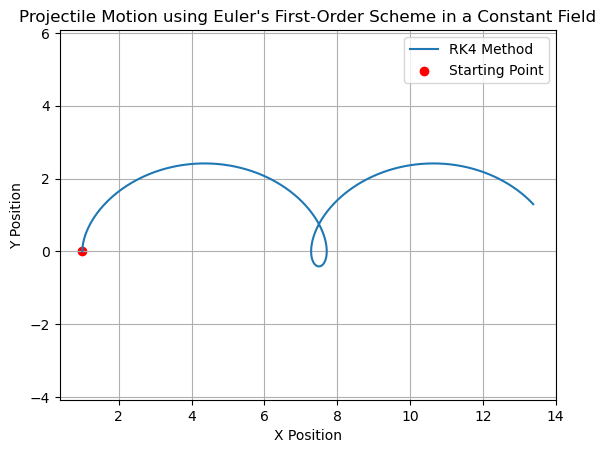

In [9]:
import pylab as plt

dt = 0.0001  # seconds
num_steps = 100000
# Simulate projectile motion using Euler's first-order scheme
x_rk4, y_rk4 = rk4_method(dt, num_steps, E, B)

# Plot the trajectory
# plt.figure(figsize=(10, 6))
plt.plot(x_rk4, y_rk4, label="RK4 Method")
plt.scatter(x0, y0, color='red', label='Starting Point')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title("Projectile Motion using Euler's First-Order Scheme in a Constant Field")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# Analytics

$$
\begin{align*}
\frac{d\mathbf{v}}{dt} &= \frac{q}{m} \left( \mathbf{E} + \mathbf{v} \times \mathbf{B} \right) \\
\dfrac{dv_x}{dt} &= \frac{q}{m} v_y B_z \\
\dfrac{dv_y}{dt} &= \frac{q}{m} E - v_x B
\end{align*}
$$

For this simple cross-fields, we can solve the Lorentz equations analytically.  We have a cycloid motion with the following parametric equations

$$
x(t) = R (\omega t - \sin \omega t)
$$

$$
y(t) = R (1- \cos \omega t)
$$

where $\omega = \frac{qB}{m}$ and $R = \frac{m E}{q B^2}$.

In [10]:
time = np.arange(num_steps)*dt

om = q_m*B
R = E/(om*B)
x_analytical = R * (om * time - np.sin(om*time)) + x0
y_analytical = R * (1 - np.cos(om * time)) + y0

In [11]:
time = np.arange(num_steps)*dt

om = q_m*np.abs(B)
R = E/(om*B)
x_analytical = np.cos(om*time)
y_analytical = np.sin(om*time)

# Exercises

From all the above, we have the following methods to compare
- Euler
- Leap-frog
- RK4
- Theory

### Tasks

1. Plot all the paths.
2. Find the error in each method as a function of timesteps. The error could be defined as the difference between the numerical and analytical solutions.

The errors could be defined using the $p$-norm.

$$
\epsilon = \left( \sum_i^n |x_{i,\text{numerical}} - x_{i,\text{analytic}}|^p \right)^{1/p}
$$

where $x_{i,\text{numerical}}$ is the numerical solution and $x_{i,\text{analytic}}$ is the analytical solution.

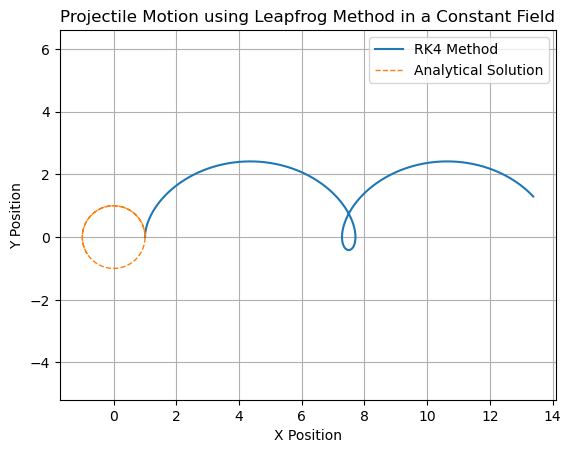

In [12]:
import pylab as plt

# Plot the trajectory
# plt.figure(figsize=(10, 6))
# plt.plot(x_euler, y_euler, label="Euler Solution")
# plt.plot(x_leapfrog, y_leapfrog, label="Leapfrog Method")
plt.plot(x_rk4, y_rk4, label="RK4 Method")
plt.plot(x_analytical, y_analytical, '--',lw=1, label="Analytical Solution")
# plt.scatter(x0, y0, color='red', label='Starting Point')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title("Projectile Motion using Leapfrog Method in a Constant Field")
plt.legend()
plt.grid(True)
plt.axis('equal')
# plt.xlim(90,100)
# plt.ylim(-3,3)
plt.show()

In [13]:
import numpy as np

# Function to calculate constant field acceleration
def constant_field_acceleration(vx, vy, E, B):
    # Define constant electromagnetic field components
    E_x = 0  # Electric field in x-direction (N/C)
    E_y = E   # Electric field in y-direction (N/C)
    B_z = B    # Magnetic field in z-direction (T)
    
    # Calculate particle's charge-to-mass ratio (q/m)
    q_m = 1  # Elementary charge to alpha particle mass ratio
    
    # Calculate acceleration components using Lorentz force equation
    ax = q_m * (E_x + vy * B_z)
    ay = q_m * (E_y - vx * B_z)
    
    return ax, ay

In [14]:
dt_list = 10**np.linspace(-4, -1, 100)
# dt_list = np.linspace(10**(-7), 10**(-4), 10)
# num_steps = 10000
tmax = 10

E = 0
B = -1

# initialize error
error_euler = np.zeros(len(dt_list))
error_leapfrog = np.zeros(len(dt_list))
error_rk4 = np.zeros(len(dt_list))

cnt = 0
for dt in dt_list:
    print('dt =', dt)
    num_steps = int(tmax/dt)
    # num_steps = 10000
    time = np.arange(num_steps)*dt
    x_euler, y_euler = euler_method(dt, num_steps, constant_field_acceleration)
    x_leapfrog, y_leapfrog = leapfrog_method(dt, num_steps, E, B)
    x_rk4, y_rk4 = rk4_method(dt, num_steps, E, B)
    om = q_m*np.abs(B)
    R = E/(om*B)
    # x_analytical = R * (om * time - np.sin(om*time))
    # y_analytical = R * (1 - np.cos(om * time))

    x_analytical = np.cos(om*time)
    y_analytical = np.sin(om*time)

    # error_euler[cnt] = np.sqrt(np.sum((x_euler - x_analytical)**2 + (y_euler - y_analytical)**2)/num_steps)
    # error_leapfrog[cnt] = np.sqrt(np.sum((x_leapfrog - x_analytical)**2 + (y_leapfrog - y_analytical)**2)/num_steps)
    # error_rk4[cnt] = np.sqrt(np.sum((x_rk4 - x_analytical)**2 + (y_rk4 - y_analytical)**2)/num_steps)

    # error_euler[cnt] = np.abs(y_euler - y_analytical).sum()/num_steps
    # error_leapfrog[cnt] = np.abs(y_leapfrog - y_analytical).sum()/num_steps
    # error_rk4[cnt] = np.abs(y_rk4 - y_analytical).sum()/num_steps
    
    error_euler[cnt] = np.abs(y_euler[-1] - y_analytical[-1])# + np.abs(x_euler[-1] - x_analytical[-1])
    error_leapfrog[cnt] = np.abs(y_leapfrog[-1] - y_analytical[-1])# + np.abs(x_leapfrog[-1] - x_analytical[-1])
    error_rk4[cnt] = np.abs(y_rk4[-1] - y_analytical[-1])# + np.abs(x_rk4[-1] - x_analytical[-1])


    # error_euler[cnt] = np.sqrt((y_euler[-1] - y_analytical[-1])**2 + (x_euler[-1] - x_analytical[-1])**2)
    # error_leapfrog[cnt] = np.sqrt((y_leapfrog[-1] - y_analytical[-1])**2 + (x_leapfrog[-1] - x_analytical[-1])**2)
    # error_rk4[cnt] = np.sqrt((y_rk4[-1] - y_analytical[-1])**2 + (x_rk4[-1] - x_analytical[-1])**2)

    # error_euler = error_euler/len(x_euler)
    # error_leapfrog = error_leapfrog/len(x_leapfrog)
    # error_rk4 = error_rk4/len(x_rk4)

    cnt += 1



dt = 0.0001
dt = 0.00010722672220103231
dt = 0.00011497569953977356
dt = 0.0001232846739442066
dt = 0.00013219411484660288
dt = 0.00014174741629268049
dt = 0.0001519911082952933
dt = 0.00016297508346206434
dt = 0.0001747528400007683
dt = 0.0001873817422860383
dt = 0.00020092330025650479
dt = 0.00021544346900318845
dt = 0.00023101297000831605
dt = 0.0002477076355991711
dt = 0.00026560877829466864
dt = 0.0002848035868435802
dt = 0.0003053855508833416
dt = 0.00032745491628777284
dt = 0.0003511191734215131
dt = 0.00037649358067924675
dt = 0.0004037017258596554
dt = 0.0004328761281083057
dt = 0.0004641588833612782
dt = 0.0004977023564332114
dt = 0.0005336699231206312
dt = 0.0005722367659350221
dt = 0.0006135907273413176
dt = 0.0006579332246575682
dt = 0.0007054802310718645
dt = 0.000756463327554629
dt = 0.0008111308307896872
dt = 0.0008697490026177834
dt = 0.0009326033468832199
dt = 0.001
dt = 0.0010722672220103231
dt = 0.0011497569953977356
dt = 0.0012328467394420659
dt = 0.001321941148466

Text(0.5, 1.0, 'Error vs. Time Step Size')

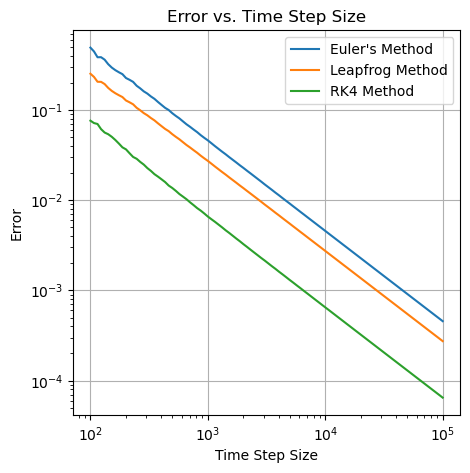

In [15]:

num_steps_list = tmax / dt_list

plt.figure(figsize=(5, 5))
plt.plot(num_steps_list, error_euler,'-', label="Euler's Method")
plt.plot(num_steps_list, error_leapfrog,'-', label="Leapfrog Method")
plt.plot(num_steps_list, error_rk4,'-', label="RK4 Method")
# plt.plot(num_steps_list, 1e3*num_steps_list**(-1), 'k--', label="First Order")

# plt.plot(dt_list, error_euler,'o-', label="Euler's Method")
# plt.plot(dt_list, error_leapfrog,'o-', label="Leapfrog Method")
# plt.plot(dt_list, error_rk4,'o-', label="RK4 Method")
# plt.plot(dt_list, dt_list, 'k--', label="First Order")

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Time Step Size')
plt.ylabel('Error')
plt.grid('on')
plt.legend()
plt.title("Error vs. Time Step Size")
# plt.xlim(10**(-4), 10**(-2))

# Comparison of Time Integration Methods

| Method                  | Scheme                                     | Error Approximation  | Stability Condition       |
|-------------------------|--------------------------------------------|----------------------|--------------------------|
| Forward Euler           | $y_{n+1} = y_n + h f(t_n, y_n)$            | $O(h)$               | $\|1 + h \lambda\| \leq 1$ |
| Backward Euler          | $y_{n+1} = y_n + h f(t_{n+1}, y_{n+1})$    | $O(h)$               | Unconditionally Stable (linear), Problem-specific (nonlinear) |
| Trapezoidal Rule        | $y_{n+1} = y_n + \frac{h}{2} ( f(t_n, y_n) + f(t_{n+1}, y_{n+1}) )$ | $O(h^2)$       | $\|1 + \frac{h \lambda}{2}\| \leq 1$ |
| Leap Frog               | $y_{n+2} = y_n + 2h f(t_{n+1}, y_{n+1})$  | $O(h^2)$             | $\|1 - 2h \lambda\| \leq 1$ |
| Runge-Kutta 4th Order   | $ \begin{aligned} & k_1 = h f(t_n, y_n) \\ & k_2 = h f \left(t_n + \frac{h}{2}, y_n + \frac{k_1}{2} \right) \\ & k_3 = h f \left(t_n + \frac{h}{2}, y_n + \frac{k_2}{2} \right) \\ & k_4 = h f(t_n + h, y_n + k_3) \\ & y_{n+1} = y_n + \frac{k_1 + 2k_2 + 2k_3 + k_4}{6} \end{aligned}$                                | $O(h^4)$             | $\|1 + \frac{h \lambda}{6}\| \leq 1$ |

Here, $\lambda = \Omega$ and $h = \Delta t$.



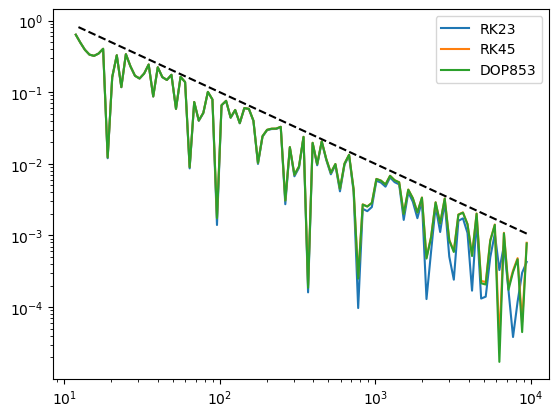

In [16]:
from scipy.integrate import solve_ivp
import pylab as pl
import numpy as np

F = lambda t, s: np.cos(t)

tmax = 3*np.pi

dt_list = 10**np.linspace(-3, -0.1, 100)
error1 = np.zeros_like(dt_list)
error2 = np.zeros_like(dt_list)
error3 = np.zeros_like(dt_list)

for cnt, dt in enumerate(dt_list):
    t_eval = np.arange(0, tmax, dt)
    sol1 = solve_ivp(F, [0, tmax], [0], method = 'RK23', t_eval=t_eval)
    sol2 = solve_ivp(F, [0, tmax], [0], method = 'RK45', t_eval=t_eval)
    sol3 = solve_ivp(F, [0, tmax], [0], method = 'DOP853', t_eval=t_eval)

    error1[cnt] = np.abs(sol1.y[0][-1] - np.sin(tmax))
    error2[cnt] = np.abs(sol2.y[0][-1] - np.sin(tmax))
    error3[cnt] = np.abs(sol3.y[0][-1] - np.sin(tmax))

    # error1[cnt] = np.abs(sol1.y[0][100] - np.sin(t_eval[100]))
    # error2[cnt] = np.abs(sol2.y[0][100] - np.sin(t_eval[100]))
    # error3[cnt] = np.abs(sol3.y[0][100] - np.sin(t_eval[100]))

num_steps = tmax / dt_list

pl.loglog(num_steps, error1, '-', label='RK23')
pl.loglog(num_steps, error2, '-', label='RK45')
pl.loglog(num_steps, error3, '-', label='DOP853')
pl.loglog(num_steps, 10*num_steps**(-1), 'k--')
pl.legend()

In [17]:
from math import sin, cos, exp

def yprime(t, y):
    return y * (2 - sin(t))

def y_exact(t):
    return 2 * exp(2 * t + cos(t) - 1)

def y_init(t):
    return y_exact(t)

t0 = 0
y0 = y_exact(t0)
y1 = y_exact(t0 + 1)

def Euler_step(f, t, y, h):
    return y + h * f(t, y)

def Heun_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h, y + h * k1)
    return y + 0.5 * h * (k1 + k2)

def RK2_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5 * h, y + 0.5 * h * k1)
    return y + h * k2

def RK3_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5 * h, y + 0.5 * h * k1)
    k3 = f(t + h, y + h * (2 * k2 - k1))
    return y + h * (k1 + 4 * k2 + k3) / 6

def RK4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5 * h, y + 0.5 * h * k1)
    k3 = f(t + 0.5 * h, y + 0.5 * h * k2)
    k4 = f(t + h, y + h * k3)
    return y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

methods = {"Euler": Euler_step, "Heun": Heun_step, "RK2": RK2_step, "RK3": RK3_step, "RK4": RK4_step}

def test_method(name, order, subdivisions):
    stepper = methods[name]
    for N in subdivisions:
        h = 1.0 / N
        y = y0
        for k in range(N):
            y = stepper(yprime, t0 + k * h, y, h)

        print("%5s:  h=%.2e, N=%5u;  y[N]=%.8f, y[N]-y(1)=%.4e, N^%d*(y[N]-y(1))=%.4f" % (name, h, N, y, y - y1, order, N**order * (y - y1)))
    print("----")

def error_global(name, N):
    h = 1.0 / N
    y = y0
    for k in range(N):
        y = methods[name](yprime, t0 + k * h, y, h)
    return abs(y - y1)

test_method("Euler", 1, [40, 200, 10000])
test_method("Heun", 2, [100, 500, 5000])
test_method("RK2", 2, [100, 500, 5000])
test_method("RK3", 3, [20, 250, 5000])
test_method("RK4", 4, [8, 50, 1000])


Euler:  h=2.50e-02, N=   40;  y[N]=9.15192033, y[N]-y(1)=-1.8008e-01, N^1*(y[N]-y(1))=-7.2032
Euler:  h=5.00e-03, N=  200;  y[N]=9.29508303, y[N]-y(1)=-3.6918e-02, N^1*(y[N]-y(1))=-7.3836
Euler:  h=1.00e-04, N=10000;  y[N]=9.33125831, y[N]-y(1)=-7.4293e-04, N^1*(y[N]-y(1))=-7.4293
----
 Heun:  h=1.00e-02, N=  100;  y[N]=9.33143081, y[N]-y(1)=-5.7042e-04, N^2*(y[N]-y(1))=-5.7042
 Heun:  h=2.00e-03, N=  500;  y[N]=9.33197820, y[N]-y(1)=-2.3033e-05, N^2*(y[N]-y(1))=-5.7582
 Heun:  h=2.00e-04, N= 5000;  y[N]=9.33200100, y[N]-y(1)=-2.3081e-07, N^2*(y[N]-y(1))=-5.7703
----
  RK2:  h=1.00e-02, N=  100;  y[N]=9.33168345, y[N]-y(1)=-3.1778e-04, N^2*(y[N]-y(1))=-3.1778
  RK2:  h=2.00e-03, N=  500;  y[N]=9.33198843, y[N]-y(1)=-1.2806e-05, N^2*(y[N]-y(1))=-3.2016
  RK2:  h=2.00e-04, N= 5000;  y[N]=9.33200111, y[N]-y(1)=-1.2828e-07, N^2*(y[N]-y(1))=-3.2070
----
  RK3:  h=5.00e-02, N=   20;  y[N]=9.33173585, y[N]-y(1)=-2.6538e-04, N^3*(y[N]-y(1))=-2.1231
  RK3:  h=4.00e-03, N=  250;  y[N]=9.33200109

In [18]:
# N_list = 10**np.linspace(1,6,100)

# error_euler = np.zeros_like(N_list)
# error_Huen = np.zeros_like(N_list)
# error_RK2 = np.zeros_like(N_list)
# error_RK3 = np.zeros_like(N_list)
# error_RK4 = np.zeros_like(N_list)

# for cnt, N in enumerate(N_list):
#     error_euler[cnt] = error_global("Euler", int(N))
#     error_Huen[cnt] = error_global("Heun", int(N))
#     error_RK2[cnt] = error_global("RK2", int(N))
#     error_RK3[cnt] = error_global("RK3", int(N))
#     error_RK4[cnt] = error_global("RK4", int(N))

# pl.loglog(N_list, error_euler, '-', label='Euler')
# pl.loglog(N_list, error_Huen, '-', label='Heun')
# pl.loglog(N_list, error_RK2, '-', label='RK2')
# pl.loglog(N_list, error_RK3, '-', label='RK3')
# pl.loglog(N_list, error_RK4, '-', label='RK4')
# pl.legend()

In [19]:
pl.figure(figsize = (5,5))
pl.loglog(N_list, error_euler, '-', label='Euler')
pl.loglog(N_list, error_Huen, '-', label='Heun')
pl.loglog(N_list, error_RK2, '-', label='RK2')
pl.loglog(N_list, error_RK3, '-', label='RK3')
pl.loglog(N_list, error_RK4, '-', label='RK4')
pl.legend()

pl.grid('on')

NameError: name 'N_list' is not defined

<Figure size 500x500 with 0 Axes>

$y' = [x',v'] = [v, q/m(E + v \times B)]$

$[x',y',v_x',v_y'] = [v_x,v_y, q/m(v_y B), q/m(E - v_x B)]$

In [ ]:
from math import sin, cos, exp
import numpy as np

B = 1
E = 1
q_m = 1

def yprime(t, y):
    return np.array([y[2], y[3], q_m*y[3]*B, q_m*(E - y[2]*B)])

def y_exact(time):
    om = q_m*B
    R = E/(om*B)
    x_analytical = R * (om * time - np.sin(om*time))
    y_analytical = R * (1 - np.cos(om * time))
    vx_analytical = R * (om - om* np.cos(om*time))
    vy_analytical = R * om*(np.sin(om * time))
    return np.array([x_analytical, y_analytical, vx_analytical, vy_analytical])

t0 = 0
y0 = y_exact(t0)
y1 = y_exact(t0 + 1)

def Euler_step(f, t, y, h):
    return y + h * f(t, y)

def Heun_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h, y + h * k1)
    return y + 0.5 * h * (k1 + k2)

def RK2_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5 * h, y + 0.5 * h * k1)
    return y + h * k2

def RK3_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5 * h, y + 0.5 * h * k1)
    k3 = f(t + h, y + h * (2 * k2 - k1))
    return y + h * (k1 + 4 * k2 + k3) / 6

def RK4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5 * h, y + 0.5 * h * k1)
    k3 = f(t + 0.5 * h, y + 0.5 * h * k2)
    k4 = f(t + h, y + h * k3)
    return y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

methods = {"Euler": Euler_step, "Heun": Heun_step, "RK2": RK2_step, "RK3": RK3_step, "RK4": RK4_step}

def test_method(name, order, subdivisions):
    stepper = methods[name]
    for N in subdivisions:
        h = 1.0 / N
        y = y0
        for k in range(N):
            y = stepper(yprime, t0 + k * h, y, h)

        print("%5s:  h=%.2e, N=%5u;  y[N]=%.8f, y[N]-y(1)=%.4e, N^%d*(y[N]-y(1))=%.4f" % (name, h, N, y[-1], y[-1] - y1[-1], order, N**order * (y[-1] - y1[-1])))
    print("----")

def error_global(name, N):
    h = 1.0 / N
    y = y0
    for k in range(N):
        y = methods[name](yprime, t0 + k * h, y, h)
    return abs(y[0] - y1[0])

test_method("Euler", 1, [40, 200, 10000])
test_method("Heun", 2, [100, 500, 5000])
test_method("RK2", 2, [100, 500, 5000])
test_method("RK3", 3, [20, 250, 5000])
test_method("RK4", 4, [8, 50, 1000])


Euler:  h=2.50e-02, N=   40;  y[N]=0.85193811, y[N]-y(1)=1.0467e-02, N^1*(y[N]-y(1))=0.4187
Euler:  h=5.00e-03, N=  200;  y[N]=0.84357275, y[N]-y(1)=2.1018e-03, N^1*(y[N]-y(1))=0.4204
Euler:  h=1.00e-04, N=10000;  y[N]=0.84151306, y[N]-y(1)=4.2073e-05, N^1*(y[N]-y(1))=0.4207
----
 Heun:  h=1.00e-02, N=  100;  y[N]=0.84148009, y[N]-y(1)=9.1098e-06, N^2*(y[N]-y(1))=0.0911
 Heun:  h=2.00e-03, N=  500;  y[N]=0.84147135, y[N]-y(1)=3.6104e-07, N^2*(y[N]-y(1))=0.0903
 Heun:  h=2.00e-04, N= 5000;  y[N]=0.84147099, y[N]-y(1)=3.6029e-09, N^2*(y[N]-y(1))=0.0901
----
  RK2:  h=1.00e-02, N=  100;  y[N]=0.84148009, y[N]-y(1)=9.1098e-06, N^2*(y[N]-y(1))=0.0911
  RK2:  h=2.00e-03, N=  500;  y[N]=0.84147135, y[N]-y(1)=3.6104e-07, N^2*(y[N]-y(1))=0.0903
  RK2:  h=2.00e-04, N= 5000;  y[N]=0.84147099, y[N]-y(1)=3.6029e-09, N^2*(y[N]-y(1))=0.0901
----
  RK3:  h=5.00e-02, N=   20;  y[N]=0.84146672, y[N]-y(1)=-4.2665e-06, N^3*(y[N]-y(1))=-0.0341
  RK3:  h=4.00e-03, N=  250;  y[N]=0.84147098, y[N]-y(1)=-2.239

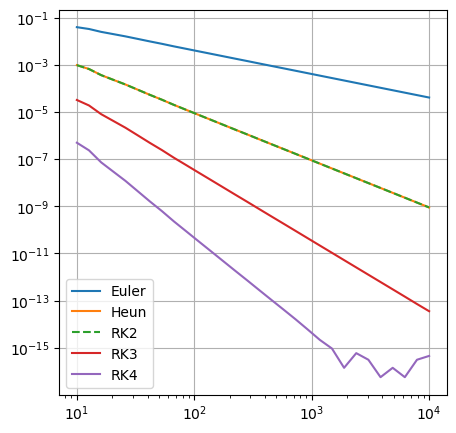

In [ ]:
import pylab as pl
N_list = 10**np.linspace(1,4,30)

error_euler = np.zeros_like(N_list)
error_Huen = np.zeros_like(N_list)
error_RK2 = np.zeros_like(N_list)
error_RK3 = np.zeros_like(N_list)
error_RK4 = np.zeros_like(N_list)

for cnt, N in enumerate(N_list):
    error_euler[cnt] = error_global("Euler", int(N))
    error_Huen[cnt] = error_global("Heun", int(N))
    error_RK2[cnt] = error_global("RK2", int(N))
    error_RK3[cnt] = error_global("RK3", int(N))
    error_RK4[cnt] = error_global("RK4", int(N))

pl.figure(figsize = (5,5))
pl.loglog(N_list, error_euler, '-', label='Euler')
pl.loglog(N_list, error_Huen, '-', label='Heun')
pl.loglog(N_list, error_RK2, '--', label='RK2')
pl.loglog(N_list, error_RK3, '-', label='RK3')
pl.loglog(N_list, error_RK4, '-', label='RK4')
pl.legend()

pl.grid('on')

In [ ]:
error_Huen - error_RK2

array([ 0.00000000e+00,  2.77555756e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.77555756e-17,  0.00000000e+00, -2.77555756e-17,
        0.00000000e+00, -2.77555756e-17, -2.77555756e-17,  2.77555756e-17,
       -2.77555756e-17,  0.00000000e+00,  2.77555756e-17,  5.55111512e-17,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.77555756e-17,  5.55111512e-17,  0.00000000e+00,  2.77555756e-17,
       -2.77555756e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.55111512e-17, -2.77555756e-17])

In [ ]:
pl.figure(figsize = (5,5))
pl.loglog(N_list, error_euler, '-', label='Euler')
pl.loglog(N_list, error_Huen, '-', label='Heun')
pl.loglog(N_list, error_RK2, '--', label='RK2')
pl.loglog(N_list, error_RK3, '-', label='RK3')
pl.loglog(N_list, error_RK4, '-', label='RK4')
pl.legend()

pl.grid('on')
pl.xlabel('Number of Steps')
pl.ylabel('Error')
pl.title('Error of Lorentz Motion')
pl.tight_layout()
pl.savefig('error.png',dpi=400)

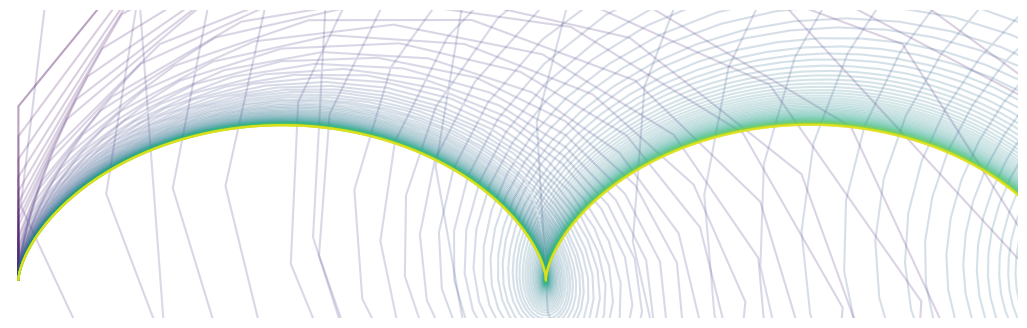

In [6]:
# find trajectory of a charged particle in a magnetic field using all the methods
import pylab as plt
from math import sin, cos, exp
import numpy as np

B = 1
E = 1
q_m = 1

def yprime(t, y):
    return np.array([y[2], y[3], q_m*y[3]*B, q_m*(E - y[2]*B)])

def y_exact(time):
    om = q_m*B
    R = E/(om*B)
    x_analytical = R * (om * time - np.sin(om*time))
    y_analytical = R * (1 - np.cos(om * time))
    vx_analytical = R * (om - om* np.cos(om*time))
    vy_analytical = R * om*(np.sin(om * time))
    return np.array([x_analytical, y_analytical, vx_analytical, vy_analytical])

t0 = 0
y0 = y_exact(t0)
y1 = y_exact(t0 + 1)

def Euler_step(f, t, y, h):
    return y + h * f(t, y)

def Heun_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h, y + h * k1)
    return y + 0.5 * h * (k1 + k2)

def RK2_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5 * h, y + 0.5 * h * k1)
    return y + h * k2

def RK3_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5 * h, y + 0.5 * h * k1)
    k3 = f(t + h, y + h * (2 * k2 - k1))
    return y + h * (k1 + 4 * k2 + k3) / 6

def RK4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5 * h, y + 0.5 * h * k1)
    k3 = f(t + 0.5 * h, y + 0.5 * h * k2)
    k4 = f(t + h, y + h * k3)
    return y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

methods = {"Euler": Euler_step, "Heun": Heun_step, "RK2": RK2_step, "RK3": RK3_step, "RK4": RK4_step}

def evolve(name, N):
    x_pos = np.zeros(N)
    y_pos = np.zeros(N)
    x_pos[0] = y0[0]
    y_pos[0] = y0[1]
    stepper = methods[name]
    h = 15.0 / N
    y = y0
    for k in range(N):
        y = stepper(yprime, t0 + k * h, y, h)
        x_pos[k] = y[0]
        y_pos[k] = y[1]
    return x_pos, y_pos

N_list = np.array(10**np.linspace(1,4,100), dtype=int)

plt.figure(figsize=(13, 4))
for i, N in enumerate(N_list):
    x_pos, y_pos = evolve("Euler", N)
    plt.plot(x_pos, y_pos, color = plt.cm.viridis(i/len(N_list)), alpha = 0.2)

plt.ylim(-0.5, 3.5)
plt.xlim(-0.1, 11.9)
plt.axis('off')
plt.savefig('chap2-lorentz.png', dpi=300, bbox_inches='tight')
# plt.legend()


In [24]:
y.shape

(4,)